[@LorenaABarba](https://twitter.com/LorenaABarba)

In [1]:
# (La cellule ci-dessus exécute le style de ce bloc-note.)
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

**12 étapes vers Navier–Stokes**
=====
***

Avez-vous tout réussi jusqu'ici? C'est la dernière étape ! Combien de temps vous a-t-il fallu pour écrire votre propre solveur Navier–Stokes en Python à la suite de ce module interactif ? Faites le nous savoir!

Étape 12: Flux de canal avec Navier – Stokes
----
***

La seule différence entre cette dernière étape et l'étape 11 est que nous allons ajouter un terme source à l'équation de conservation de quantité de mouvement dans la direction  $u$, pour imiter l'effet d'un écoulement de canal commandé par la pression. Voici nos équations de Navier-Stokes modifiées :

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

### Équations discrétisées

Avec patience et précaution, nous écrivons la forme discrétisée des équations. Il est fortement recommandé que vous les écriviez de votre propre main, en suivant mentalement chaque terme au fur et à mesure que vous l'écrivez.

L'équation de conservation de la quantité de mouvement dans la direction $u$:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}
$$

L'équation de conservation de la quantité de mouvement dans la direction $v$:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Et l'équation de pression :

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Comme toujours, nous devons réorganiser ces équations sous la forme dont nous avons besoin dans le code pour que les itérations se poursuivent.

Pour les équations de conservation de la quantité de mouvement, nous isolons la vitesse au pas de temps `n+1` :
$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}
$$

Et pour l'équation de pression, on isole le terme $p_{i,j}^n$ pour itérer en pseudo-temps :

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

La condition initiale est $u, v, p=0$ partout, et les conditions  aux limites sont :
$u, v, p$ are periodic on $x=0,2$

$u, v =0$ en $y =0,2$

$\frac{\partial p}{\partial y}=0$ en $y =0,2$

$F=1$ partout.

Commençons par importer notre série habituelle de bibliothèques :


In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

À l'étape 11, nous avons isolé une partie de notre équation transposée pour la rendre plus facile à analyser et nous allons faire la même chose ici. Une chose à noter est que nous avons des conditions aux limites périodiques tout au long de cette grille, nous devons donc calculer explicitement les valeurs aux bords avant et arrière de notre vecteur `u`.

In [3]:
def build_up_b(rho, dt, dx, dy, u, v):
    b = numpy.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    # Condition aux limites en Pression à x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +
                                    (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -
                          ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                               (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                          ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

    # Condition aux limites en Pression   à x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +
                                   (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -
                         ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                              (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                         ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    
    return b

Nous définirons également une fonction itérative Pression Poisson, comme nous l'avons fait à l'étape 11. Une fois de plus, notez que nous devons inclure les conditions aux limites périodiques aux bords d'attaque et de fuite. Nous devons également spécifier les conditions aux limites en haut et en bas de notre grille.

In [4]:
def pressure_poisson_periodic(p, dx, dy):
    pn = numpy.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Condition aux limites périodique en Pression  à x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                        (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Condition aux limites périodique en Pression  à  x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                       (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Conditions aux limites du mur en pression
        p[-1, :] =p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    
    return p

Nous avons maintenant notre liste familière de variables et de conditions initiales à déclarer avant de commencer.

In [5]:
## déclarations des variables
nx = 41
ny = 41
nt = 10
nit = 50 
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)


## variables physiques
rho = 1
nu = .1
F = 1
dt = .01

# conditions initiales
u = numpy.zeros((ny, nx))
un = numpy.zeros((ny, nx))

v = numpy.zeros((ny, nx))
vn = numpy.zeros((ny, nx))

p = numpy.ones((ny, nx))
pn = numpy.ones((ny, nx))

b = numpy.zeros((ny, nx))

Pour l'essentiel de notre calcul, nous allons revenir à une astuce que nous avons utilisée à l'étape 9 pour l'équation de Laplace. Nous nous intéressons à ce à quoi ressemblera notre réseau une fois que nous aurons atteint un état quasi stable. Nous pouvons soit spécifier un certain nombre de pas de temps `nt` et l'incrémenter jusqu'à ce que nous soyons satisfaits des résultats, soit nous pouvons dire à notre code de s'exécuter jusqu'à ce que la différence entre deux itérations consécutives soit très petite.

Nous devons également gérer **8** conditions aux limites distinctes pour chaque itération. Le code ci-dessous écrit chacun d'eux explicitement. Si vous êtes intéressé par un défi, vous pouvez essayer d'écrire une fonction qui peut gérer tout ou partie de ces conditions aux limites. Si cela vous intéresse, vous devriez probablement lire Python [dictionnaires](http://docs.python.org/2/tutorial/datastructures.html#dictionaries).


In [6]:
udiff = 1
stepcount = 0

while udiff > .001:
    un = u.copy()
    vn = v.copy()

    b = build_up_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * 
                    (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                     F * dt)

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * 
                    (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    # Periodic BC u @ x = 2     
    u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx * 
                  (un[1:-1, -1] - un[1:-1, -2]) -
                   vn[1:-1, -1] * dt / dy * 
                  (un[1:-1, -1] - un[0:-2, -1]) -
                   dt / (2 * rho * dx) *
                  (p[1:-1, 0] - p[1:-1, -2]) + 
                   nu * (dt / dx**2 * 
                  (un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2]) +
                   dt / dy**2 * 
                  (un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])) + F * dt)

    # Periodic BC u @ x = 0
    u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
                 (un[1:-1, 0] - un[1:-1, -1]) -
                  vn[1:-1, 0] * dt / dy * 
                 (un[1:-1, 0] - un[0:-2, 0]) - 
                  dt / (2 * rho * dx) * 
                 (p[1:-1, 1] - p[1:-1, -1]) + 
                  nu * (dt / dx**2 * 
                 (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +
                  dt / dy**2 *
                 (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)

    # Periodic BC v @ x = 2
    v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
                  (vn[1:-1, -1] - vn[1:-1, -2]) - 
                   vn[1:-1, -1] * dt / dy *
                  (vn[1:-1, -1] - vn[0:-2, -1]) -
                   dt / (2 * rho * dy) * 
                  (p[2:, -1] - p[0:-2, -1]) +
                   nu * (dt / dx**2 *
                  (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +
                   dt / dy**2 *
                  (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))

    # Periodic BC v @ x = 0
    v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
                 (vn[1:-1, 0] - vn[1:-1, -1]) -
                  vn[1:-1, 0] * dt / dy *
                 (vn[1:-1, 0] - vn[0:-2, 0]) -
                  dt / (2 * rho * dy) * 
                 (p[2:, 0] - p[0:-2, 0]) +
                  nu * (dt / dx**2 * 
                 (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +
                  dt / dy**2 * 
                 (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))


    # Wall BC: u,v = 0 @ y = 0,2
    u[0, :] = 0
    u[-1, :] = 0
    v[0, :] = 0
    v[-1, :]=0
    
    udiff = (numpy.sum(u) - numpy.sum(un)) / numpy.sum(u)
    stepcount += 1

Vous pouvez voir que nous avons également inclus une variable `stepcount` pour voir combien d'itérations notre boucle a parcourues avant que notre condition d'arrêt ne soit remplie.

In [7]:
print(stepcount)

499


If you want to see how the number of iterations increases as our `udiff` condition gets smaller and smaller, try defining a function to perform the `while` loop written above that takes an input `udiff` and outputs the number of iterations that the function runs.  

For now, let's look at our results.  We've used the quiver function to look at the cavity flow results and it works well for channel flow, too.  

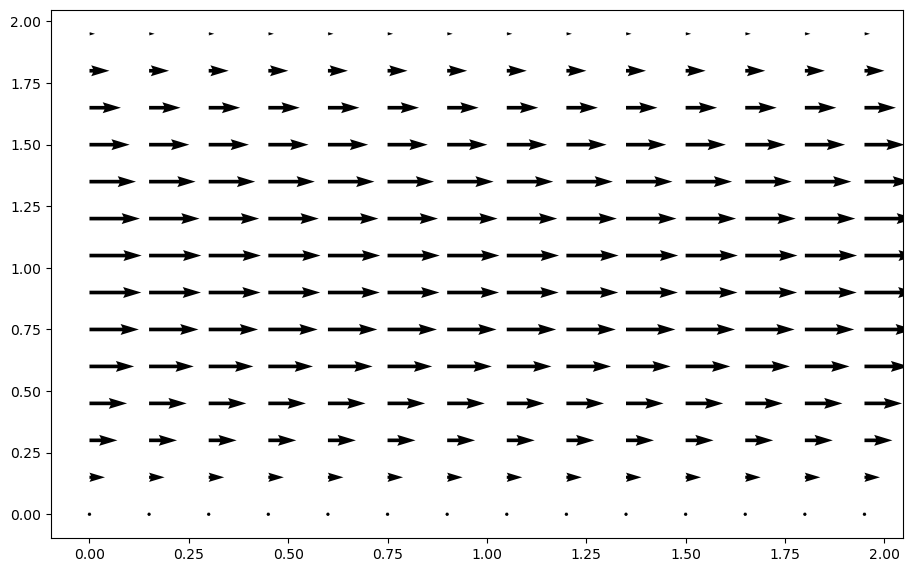

In [8]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);

Les structures de la commande `quiver` qui ressemblent à `[::3, ::3]` sont utiles lorsque vous traitez de grandes quantités de données que vous souhaitez visualiser. Celui utilisé ci-dessus indique à `matplotlib` de ne tracer que tous les 3 points de données. Si nous le laissons de côté, vous pouvez voir que les résultats peuvent apparaître un peu encombrés.

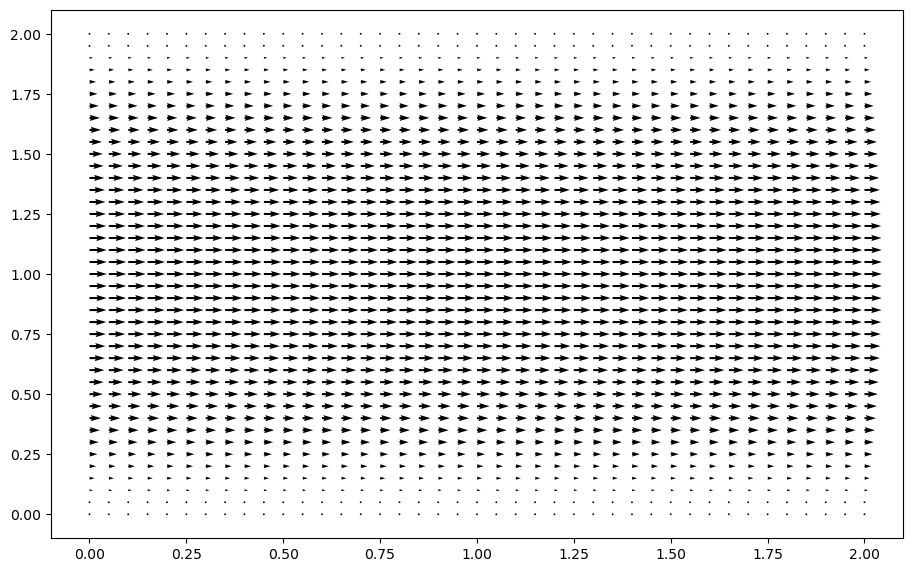

In [9]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X, Y, u, v);

## Pour en savoir plus ...
***

##### What is the meaning of the $F$ term?

Step 12 is an exercise demonstrating the problem of flow in a channel or pipe. If you recall from your fluid mechanics class, a specified pressure gradient is what drives Poisseulle flow. 

Recall the $x$-momentum equation:

$$\frac{\partial u}{\partial t}+u \cdot \nabla u = -\frac{\partial p}{\partial x}+\nu \nabla^2 u$$

What we actually do in Step 12 is split the pressure into steady and unsteady components $p=P+p'$. The applied steady pressure gradient is the constant $-\frac{\partial P}{\partial x}=F$ (interpreted as a source term), and the unsteady component is $\frac{\partial p'}{\partial x}$. So the pressure that we solve for in Step 12 is actually $p'$, which for a steady flow is in fact equal to zero everywhere.

<b>Why did we do this?</b>

Note that we use periodic boundary conditions for this flow. For a flow with a constant pressure gradient, the value of pressure on the left edge of the domain must be different from the pressure at the right edge. So we cannot apply periodic boundary conditions on the pressure directly. It is easier to fix the gradient and then solve for the perturbations in pressure.

<b>Shouldn't we always expect a uniform/constant $p'$ then?</b>

That's true only in the case of steady laminar flows. At high Reynolds numbers, flows in channels can become turbulent, and we will see unsteady fluctuations in the pressure, which will result in non-zero values for $p'$. 

In step 12, note that the pressure field itself is not constant, but it's the pressure perturbation field that is. The pressure field varies linearly along the channel with slope equal to the pressure gradient. Also, for incompressible flows, the absolute value of the pressure is inconsequential.


##### Quelle est la signification du terme $F$ ?

L'étape 12 est un exercice démontrant le problème d'écoulement dans un canal ou un tuyau. Si vous vous souvenez de votre leçon de mécanique des fluides, un gradient de pression spécifié est ce qui entraîne l'écoulement de **Poisseulle**.

Rappelez-vous l'équation de quantité de mouvent :

$$\frac{\partial u}{\partial t}+u \cdot \nabla u = -\frac{\partial p}{\partial x}+\nu \nabla^2 u$$

Ce que nous faisons réellement à l'étape 12 est de diviser la pression en composantes stables et instables $p=P+p'$. Le gradient de pression stable appliqué est la constante $-\frac{\partial P}{\partial x}=F$ (interprétée comme un terme source), et la composante instable est $\frac{\partial p'}{\partial x}$. Ainsi, la pression que nous résolvons à l'étape 12 est en fait $p'$, qui pour un flux constant est en fait égale à zéro partout.

<b>Pourquoi avons-nous fait cela ?</b>

Notez que nous utilisons des conditions aux limites périodiques pour ce flux. Pour un écoulement à gradient de pression constant, la valeur de la pression sur le bord gauche du domaine doit être différente de la pression sur le bord droit. On ne peut donc pas appliquer directement des conditions aux limites périodiques sur la pression. Il est plus facile de fixer le gradient puis de résoudre les perturbations de pression.

<b>Ne devrions-nous pas toujours nous attendre à un $p'$ uniforme/constant ?</b>

Cela n'est vrai que dans le cas d'écoulements laminaires stables. À des nombres de Reynolds élevés, les écoulements dans les canaux peuvent devenir turbulents et nous verrons des fluctuations instables de la pression, ce qui entraînera des valeurs non nulles pour $p'$.

À l'étape 12, notez que le champ de pression lui-même n'est pas constant, mais c'est le champ de perturbation de pression qui l'est. Le champ de pression varie linéairement le long du canal avec une pente égale au gradient de pression. Aussi, pour les écoulements incompressibles, la valeur absolue de la pression est sans importance.

##### Et explorez plus de supports sur la CFD  en ligne

Le module interactif **12 étapes vers Navier–Stokes** est l'une des nombreuses composantes du cours Computational Fluid Dynamics enseigné par le professeur Lorena A. Barba à l'Université de Boston entre 2009 et 2013.

Pour un échantillon des autres composants de ce cours, vous pouvez explorer la section **Ressources** de la version printemps 2013 du [site Piazza du cours](https://piazza.com/bu/spring2013/me702/ Ressources).